In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)


In [5]:
print(x)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [6]:
!pip install Minisom

  Created wheel for Minisom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=7d8e236b417b81b63e647a8446632c5284a2eaa55c8dfe0c0ad1fb3aa187db3c
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built Minisom


In [8]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [9]:
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

In [10]:
from pylab import bone, pcolor, colorbar, plot, show

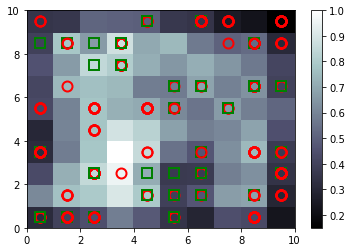

In [15]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
  w = som.winner(j)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

In [16]:
mappings = som.win_map(x)

In [18]:
fraud = np.concatenate((mappings[(8, 1)], mappings[(6, 8)]), axis = 0)

ValueError: ignored